In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

qua_att = ["#5B6A9A", "#EDAF3F", "#4A90E2",'#454D58']
sns.set()
sns.set_theme(style="darkgrid")
sns.set_palette(qua_att)

raw = pd.read_csv('domain_masked.csv')
raw

ModuleNotFoundError: No module named 'pandas'

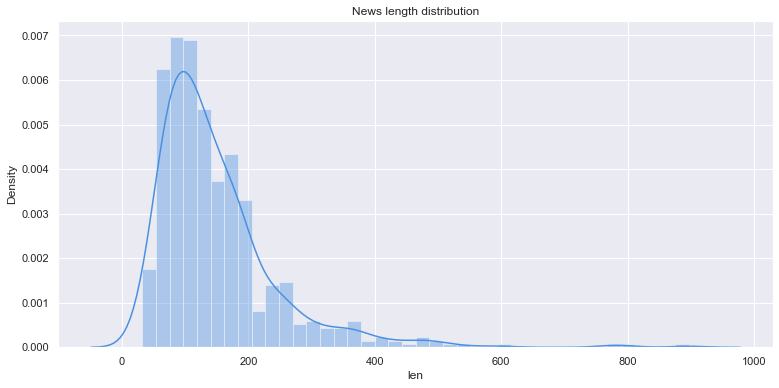

In [8]:
raw['len'] = raw['raw_text'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(raw['len']).set_title('News length distribution');

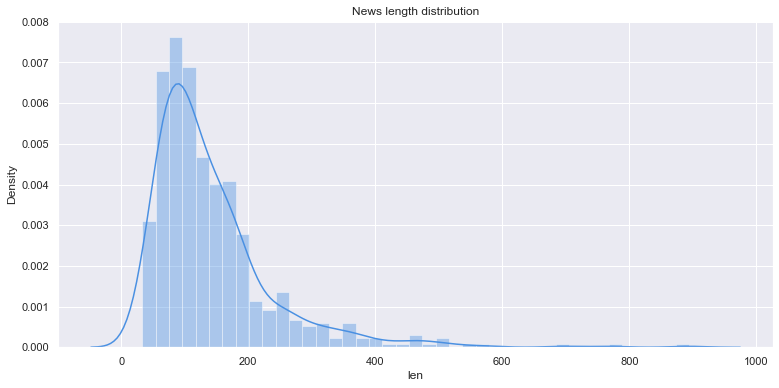

In [9]:
raw['len'] = raw['text'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(raw['len']).set_title('News length distribution');

In [152]:
from collections import Counter

attributes = ['PERFORMANCE', 'USABILITY', 'SECURITY', 'AVAILABILITY', 'MAINTAINABILITY', 'SCALABILITY', 'FAULT TOLERANCE']

data_raw = {}
data_masked = {}
for at in attributes:
    data_raw[at] = [len(Counter(" ".join(raw[raw['label'] == at]['raw_text'].tolist()).split(" ")).items())]
    data_masked[at] = [len(Counter(" ".join(raw[raw['label'] == at]['text'].tolist()).split(" ")).items())]

In [153]:
#data_raw = pd.DataFrame(list(data_raw.items()),columns = ['label','text']) 
#data_raw
data_raw = pd.DataFrame.from_dict(data_raw)
data_raw

,PERFORMANCE,USABILITY,SECURITY,AVAILABILITY,MAINTAINABILITY,SCALABILITY,FAULT TOLERANCE
0,1068,1328,888,583,476,306,180


In [154]:
data_masked = pd.DataFrame.from_dict(data_masked)
data_masked

,PERFORMANCE,USABILITY,SECURITY,AVAILABILITY,MAINTAINABILITY,SCALABILITY,FAULT TOLERANCE
0,847,1065,713,435,402,252,164


In [155]:
data_raw['source'] = 'RAW'
data_masked['source'] = 'MASKED'

df = pd.concat([data_raw,data_masked], ignore_index=True)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]  #    OR    df = df.ix[:, cols]

df

,source,PERFORMANCE,USABILITY,SECURITY,AVAILABILITY,MAINTAINABILITY,SCALABILITY,FAULT TOLERANCE
0,RAW,1068,1328,888,583,476,306,180
1,MASKED,847,1065,713,435,402,252,164


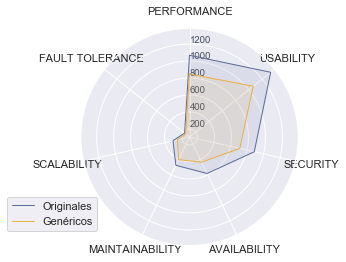

In [169]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([200,400,600, 800, 1000, 1200], ["200","400","600", "800", "1000", "1200"], color="#454D58", size=9.5)
#plt.ylim(0,40)
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('source').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Originales")
ax.fill(angles, values, '#5B6A9A', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('source').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Genéricos")
ax.fill(angles, values, '#EDAF3F', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.25))


In [131]:
values=df.loc[0].drop('source').values.flatten().tolist()
values += values[:1]
values

[1068, 1328, 888, 583, 476, 306, 180, 1068]

In [16]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
import pandas as pd

df = pd.read_csv('issues.csv', index_col=0)
df

,author,closedAt,number,publishedAt,resourcePath,source,state,text,label
0,{'login': 'jklaiho'},2019-03-25T11:40:21Z,16068,2016-05-31T12:00:14Z,/ansible/ansible/issues/16068,ansible,CLOSED,Magic variable role_names to also list roles b...,NONE
1,{'login': 'jsmartin'},2014-09-29T20:46:26Z,4578,2013-10-18T02:51:50Z,/ansible/ansible/issues/4578,ansible,CLOSED,"SmartOS IP address fact\nOn SmartOS, in contra...",NONE
2,{'login': 'tumbl3w33d'},2017-08-19T23:13:23Z,22337,2017-03-06T23:01:55Z,/ansible/ansible/issues/22337,ansible,CLOSED,maven_artifact module should allow preserving ...,NONE
3,{'login': 'zerkms'},2015-05-04T23:42:47Z,10915,2015-05-04T23:39:55Z,/ansible/ansible/issues/10915,ansible,CLOSED,SSH connection is established for every comman...,SECURITY
4,{'login': 'claco'},2014-09-29T20:46:57Z,7860,2014-06-20T02:52:32Z,/ansible/ansible/issues/7860,ansible,CLOSED,rax_identity stacktraces with pyrax >= 1.8.0\n...,NONE
...,...,...,...,...,...,...,...,...,...
495,{'login': 'genzoman'},2017-05-12T08:41:53Z,26483,2017-05-11T19:33:47Z,/microsoft/vscode/issues/26483,vscode,CLOSED,Go to current file from viewing diff. \nedit a...,NONE
496,{'login': 'pankajsaini123'},2018-06-08T10:00:47Z,51415,2018-06-08T04:17:07Z,/microsoft/vscode/issues/51415,vscode,CLOSED,unable to update \nIssue Type: Bug\nI am using...,NONE
497,{'login': 'AccessibilityTestingTeam-TCS'},2018-07-05T14:46:44Z,53485,2018-07-03T11:17:41Z,/microsoft/vscode/issues/53485,vscode,CLOSED,Move editor group into next/previous group(Ctr...,NONE
498,{'login': 'chrisdias'},2017-01-19T14:14:37Z,9638,2016-07-22T20:22:21Z,/microsoft/vscode/issues/9638,vscode,CLOSED,close icon on terminal/console/etc. pane shoul...,USABILITY


In [17]:
df = df[df['label'] != 'NONE']
df

,author,closedAt,number,publishedAt,resourcePath,source,state,text,label
3,{'login': 'zerkms'},2015-05-04T23:42:47Z,10915,2015-05-04T23:39:55Z,/ansible/ansible/issues/10915,ansible,CLOSED,SSH connection is established for every comman...,SECURITY
5,{'login': 'ansible-bug-reporter'},2017-05-12T00:45:18Z,24460,2017-05-10T19:03:23Z,/ansible/ansible/issues/24460,ansible,CLOSED,Force_handlers with_items does not execute han...,FAULT TOLERANCE
7,{'login': 'jlec'},2017-02-27T15:14:03Z,15326,2016-04-07T15:55:25Z,/ansible/ansible/issues/15326,ansible,CLOSED,password_hash/get_encrypted_password uses pass...,PERFORMANCE
10,{'login': 'blakfeld'},2016-03-01T04:18:53Z,14659,2016-02-25T15:39:17Z,/ansible/ansible/issues/14659,ansible,CLOSED,--diff Flag crashes on win_copy\nIssue Type:\n...,FAULT TOLERANCE
11,{'login': 'sebi-hgdata'},2015-08-12T14:50:19Z,11881,2015-08-06T19:53:25Z,/ansible/ansible/issues/11881,ansible,CLOSED,Variable overding during nested includes issue...,MAINTAINABILITY
...,...,...,...,...,...,...,...,...,...
488,{'login': 'MashaMSFT'},2019-02-19T18:51:11Z,68659,2019-02-13T22:51:14Z,/microsoft/vscode/issues/68659,vscode,CLOSED,CLI code snippets do not change font color\nWh...,USABILITY
490,{'login': 'octref'},2017-11-01T15:10:37Z,37335,2017-10-31T19:04:26Z,/microsoft/vscode/issues/37335,vscode,CLOSED,"When launching attach config unsuccessfully, d...",USABILITY
493,{'login': 'kishandonepudi'},2018-09-03T03:01:49Z,57059,2018-08-23T05:47:07Z,/microsoft/vscode/issues/57059,vscode,CLOSED,"Replace text\nHi Team,\nI have replaced a word...",MAINTAINABILITY
494,{'login': 'Eldaw'},2018-09-19T14:57:16Z,32853,2017-08-20T18:28:39Z,/microsoft/vscode/issues/32853,vscode,CLOSED,"Text gets selected, to the next line, when the...",USABILITY


In [41]:
calculated = df.source.value_counts()
calculated

ansible       51
kubernetes    44
vscode        39
tensorflow    29
flutter       22
Name: source, dtype: int64

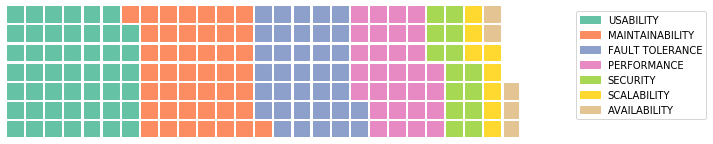

In [31]:
fig = plt.figure(
    FigureClass=Waffle, 
    columns=27, 
    values=list(calculated.values),
    labels=list(calculated.index),
    figsize=(10, 5),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)